In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
df_economy = pd.read_csv("..\data\\all_countries_combined.csv")
df_economy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10245 entries, 0 to 10244
Data columns (total 21 columns):
 #   Column                                                                                    Non-Null Count  Dtype  
---  ------                                                                                    --------------  -----  
 0   Country                                                                                   10245 non-null  object 
 1   Year                                                                                      10245 non-null  int64  
 2   Population                                                                                10245 non-null  int64  
 3   Per capita GNI                                                                            10245 non-null  int64  
 4   Agriculture, hunting, forestry, fishing (ISIC A-B)                                        10245 non-null  float64
 5   Construction (ISIC F)                                

In [4]:
# 先筛选 1992 年及以后的数据
df_after_1992 = df_economy[df_economy['Year'] >= 1992]

# 然后按 Country 分组，计算均值（默认对数值型列计算均值）
country_mean_1992 = df_after_1992.groupby('Country').mean(numeric_only=True)

# 如果你想保留国家名作为列，而不是索引，可以 reset_index()
country_mean_1992 = country_mean_1992.reset_index()
country_mean_1992 = country_mean_1992.drop(columns="Year")
# 查看结果
print(len(country_mean_1992))
print(country_mean_1992.head())

210
         Country    Population  Per capita GNI  \
0   Afghanistan   2.587705e+07      352.000000   
1       Albania   3.041672e+06     2945.766667   
2       Algeria   3.457530e+07     3155.666667   
3       Andorra   7.087007e+04    36031.733333   
4        Angola   2.170480e+07     2096.866667   

   Agriculture, hunting, forestry, fishing (ISIC A-B)  Construction (ISIC F)  \
0                                       3.252996e+09            4.040963e+08   
1                                       1.766266e+09            9.932132e+08   
2                                       1.176986e+10            1.121880e+10   
3                                       1.202710e+07            2.236579e+08   
4                                       4.394353e+09            5.665082e+09   

   Exports of goods and services  Final consumption expenditure  \
0                   1.868442e+09                   1.127084e+10   
1                   2.283181e+09                   7.986671e+09   
2            

In [5]:
# PCA
# 提取数据与标准化（注意是每个国家之间的均值进行标准化）
df_pca = country_mean_1992.select_dtypes(include=[np.number])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_pca)
X_scaled[:2]

array([[-0.04965783, -0.6609809 , -0.17009339, -0.25336826, -0.351811  ,
        -0.2082821 , -0.23649302, -0.22600569, -0.22388323, -0.20003123,
        -0.31685346, -0.20271155, -0.24585032, -0.18881768, -0.21506501,
        -0.20423237, -0.2142719 , -0.22080837, -0.22352469],
       [-0.23163038, -0.507088  , -0.2060143 , -0.24248664, -0.34963505,
        -0.21200973, -0.24141586, -0.22229358, -0.22031611, -0.20343717,
        -0.31756517, -0.20392201, -0.2458943 , -0.19033097, -0.21689543,
        -0.20824981, -0.21339746, -0.22218072, -0.22489873]])

In [6]:
# 执行PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

因子间相关系数矩阵：
                                                    Per capita GNI  \
Per capita GNI                                            1.000000   
Agriculture, hunting, forestry, fishing (ISIC A-B)        0.737905   
Construction (ISIC F)                                     0.910050   
Exports of goods and services                             0.915400   
Final consumption expenditure                             0.995300   
General government final consumption expenditure          0.977906   
Gross capital formation                                   0.969930   
Gross fixed capital formation (including Acquis...        0.971667   
Household consumption expenditure (including No...        0.997307   
Imports of goods and services                             0.871897   
Manufacturing (ISIC D)                                    0.979317   
Mining, Manufacturing, Utilities (ISIC C-E)               0.981081   
Other Activities (ISIC J-P)                               0.991301   
Total Val

C:\Users\GZH\AppData\Local\Temp\ipykernel_22828\949750462.py:22: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


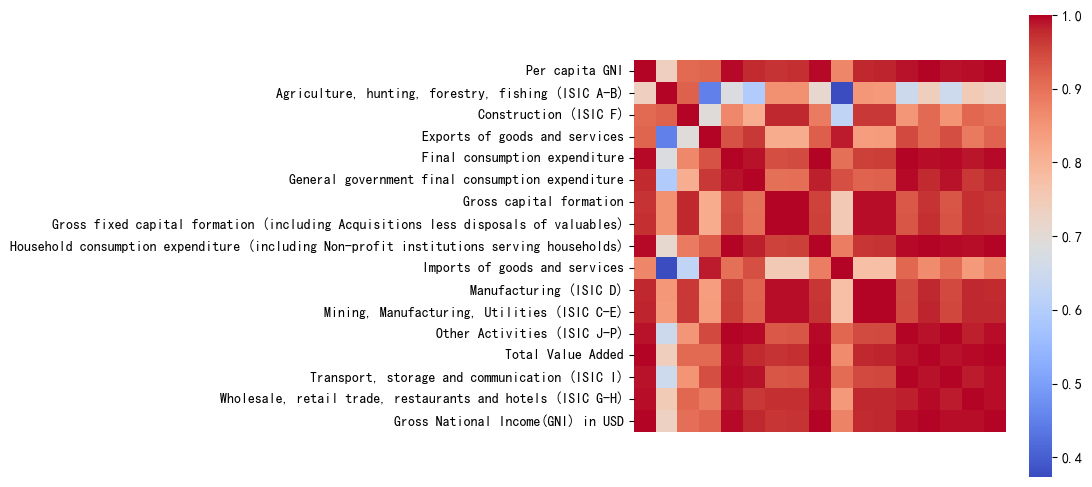

In [7]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# 设置字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 显示中文
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号
import statsmodels.api as sm
import sys, os
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
def check_multicollinearity(df,path):
    corr = df.iloc[:, 1:-1].corr()
    print("因子间相关系数矩阵：")
    print(corr)
    print()

    # 画热力图
    plt.figure(figsize=(6, 6))
    sns.heatmap(corr, annot=False, cmap='coolwarm', fmt=".2f", square=True, xticklabels=False)
    # plt.title("因子相关性热力图")
    plt.tight_layout()
    # plt.show()
    plt.savefig(os.path.join(path,"因子间相关系数矩阵.png"), dpi=300, bbox_inches='tight')
    
df = pd.read_csv("..\data\countries_data\_Japan_.csv")
df = df.drop(columns=['Country'])
df = df.drop(columns=['Year'])
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
check_multicollinearity(df_scaled,"..\\fig_tmp_gzh")


因子间相关系数矩阵：
                                                    Per capita GNI  \
Per capita GNI                                            1.000000   
Agriculture, hunting, forestry, fishing (ISIC A-B)        0.737905   
Construction (ISIC F)                                     0.910050   
Exports of goods and services                             0.915400   
Final consumption expenditure                             0.995300   
General government final consumption expenditure          0.977906   
Gross capital formation                                   0.969930   
Gross fixed capital formation (including Acquis...        0.971667   
Household consumption expenditure (including No...        0.997307   
Imports of goods and services                             0.871897   
Manufacturing (ISIC D)                                    0.979317   
Mining, Manufacturing, Utilities (ISIC C-E)               0.981081   
Other Activities (ISIC J-P)                               0.991301   
Total Val

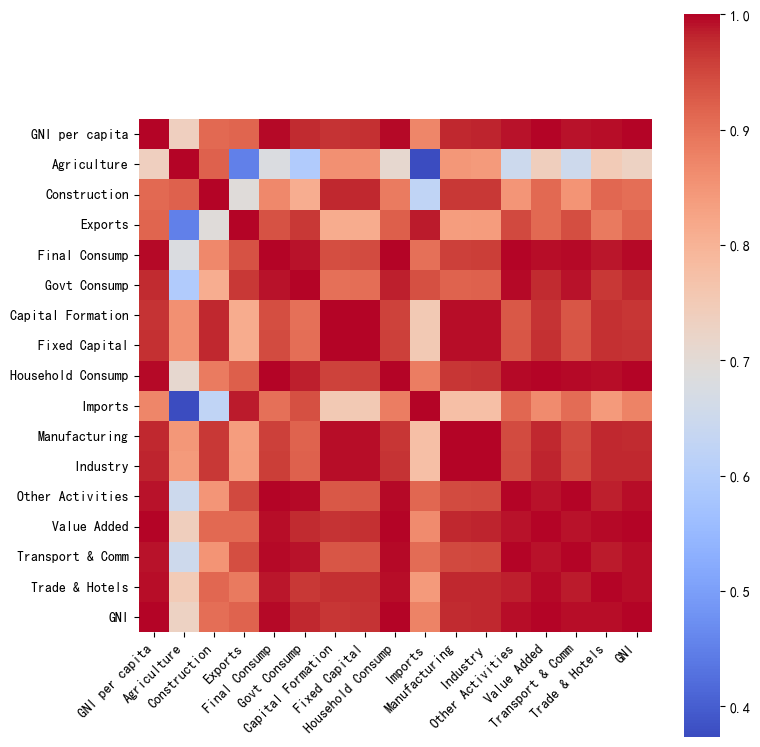

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler

def check_multicollinearity(df, path, col_rename_dict):
    # 提取相关系数矩阵
    corr = df.iloc[:, 1:-1].corr()

    print("因子间相关系数矩阵：")
    print(corr)
    print()

    # 替换列索引为简化名
    simplified_labels = [col_rename_dict.get(col, col) for col in corr.columns]
    corr.index = simplified_labels
    corr.columns = simplified_labels

    # 绘制热力图
    plt.figure(figsize=(8, 8))
    sns.heatmap(corr, annot=False, cmap='coolwarm', fmt=".2f", square=True, xticklabels=True, yticklabels=True)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.savefig(os.path.join(path, "因子间相关系数矩阵.png"), dpi=300, bbox_inches='tight')

# 简化名称映射字典
col_rename_dict = {
    "CountryID": "国家ID代码",
    "Country": "国家名",
    "Year": "年份",
    "AMA exchange rate": "AMA汇率",
    "IMF based rate": "IMF汇率",
    "Population": "人口",
    "Currency": "货币",
    "Per capital GNI": "人均国民总收入",
    "Changes in inventories": "库存变化",
    "Construction (ISIC F)": "建设行业",
    "Exports of goods and service": "出口商品服务",
    "Final consumption expenditure": "最终消费支出",
    "Agriculture, hunting, forestry, fishing": "农业、狩猎、林业、渔业",
    "General government final consumption expenditure": "一般政府最终消费支出",
    "Gross capital formation": "资本形成总额",
    "Household consumption expenditure": "住房消费支出",
    "Imports of goods and services": "进口商品服务",
    "Manufacturing (ISIC D)": "制造业",
    "Mining, Manufacturing, Utilities": "采矿、制造、公用事业",
    "Other Activities": "其他活动",
    "Total Value Added": "总增加值",
    "Transport, storage and communication (ISIC I)": "交通、储存、通信",
    "Wholesale, trade, restaurants and hotels (ISIC G-H)": "批发、贸易、餐馆、酒店",
    "Gross National Income(GNI) in USD": "国民总收入",
    "Gross Domestic Product(GDP)": "国内生产总值"
}

# 数据读取和预处理
df = pd.read_csv("..\\data\\countries_data\\_Japan_.csv")
df = df.drop(columns=['Country', 'Year'])
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# 调用函数
check_multicollinearity(df_scaled, "..\\fig_tmp_gzh", col_rename_dict)


In [1]:
9.85018839e-01+6.89587688e-03

0.99191471588